<a href="https://colab.research.google.com/github/NitinSingh8/Machine-Learning-Project/blob/main/Age_Gender_Prediction_by_Image/age_gender_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT** ===>    Age and Gender Prediction by image  

# Import the dataset 

Import the necessary modules

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import img_to_array, load_img ,  ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import cv2 

In [ ]:
#  upload kaggle.json in folder first

!mkdir -p ~/.kaggle  # creating a kaggle directory
!cp kaggle.json ~/.kaggle/ # copy the kaggle file to kaggle directory
!chmod 600 ~/.kaggle/kaggle.json # changing the right of that file

In [ ]:
!kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification

 99% 1.37G/1.39G [00:12<00:00, 127MB/s]
100% 1.39G/1.39G [00:12<00:00, 117MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/adience-benchmark-gender-and-age-classification.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("dataset extracted")

dataset extracted


In [ ]:
fold_0 = pd.read_csv('/content/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt',sep='\t')
fold_1 = pd.read_csv('/content/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt',sep='\t')
fold_2 = pd.read_csv('/content/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt',sep='\t')
fold_3 = pd.read_csv('/content/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt',sep='\t')
fold_4 = pd.read_csv('/content/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt',sep='\t')


In [ ]:
print(fold_0.shape)
print(fold_1.shape)
print(fold_2.shape)
print(fold_3.shape)
print(fold_4.shape)

(4484, 12)
(3730, 12)
(3894, 12)
(3446, 12)
(3816, 12)


In [ ]:
df = pd.concat([fold_0, fold_1,fold_2,fold_3,fold_4] , axis = 0 , ignore_index= True).reset_index(drop=True)
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


In [ ]:
df.shape

(19370, 12)

# Data Cleaning

In [ ]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


**checking the null value in  dataset**

In [ ]:
df.isnull().sum()

user_id                 0
original_image          0
face_id                 0
age                     0
gender                779
x                       0
y                       0
dx                      0
dy                      0
tilt_ang                0
fiducial_yaw_angle      0
fiducial_score          0
dtype: int64

In [ ]:
df.dropna(how='any',inplace = True) # dropping the null value of gender  
df.isnull().sum()

user_id               0
original_image        0
face_id               0
age                   0
gender                0
x                     0
y                     0
dx                    0
dy                    0
tilt_ang              0
fiducial_yaw_angle    0
fiducial_score        0
dtype: int64

In [ ]:
df.duplicated(keep=False).value_counts() # we don't have any duplicated row in dataset

False    18591
dtype: int64

In [ ]:
df.drop_duplicates(keep=False).shape # still we are dropping the duplicate although we know there is no duplicate row by above cell

(18591, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18591 entries, 0 to 19345
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             18591 non-null  object
 1   original_image      18591 non-null  object
 2   face_id             18591 non-null  int64 
 3   age                 18591 non-null  object
 4   gender              18591 non-null  object
 5   x                   18591 non-null  int64 
 6   y                   18591 non-null  int64 
 7   dx                  18591 non-null  int64 
 8   dy                  18591 non-null  int64 
 9   tilt_ang            18591 non-null  int64 
 10  fiducial_yaw_angle  18591 non-null  int64 
 11  fiducial_score      18591 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [ ]:
df.describe() # Let see more about data 

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,18591.000000,18591.000000,18591.000000,18591.000000,18591.000000,18591.000000,18591.000000,18591.000000
mean,1010.504276,951.971814,672.949438,632.228928,628.968479,-11.239148,3.113603,72.485611
std,649.844374,671.166489,430.780437,440.871014,426.850141,72.935040,15.707870,38.880226
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,485.000000,439.000000,330.500000,320.000000,323.000000,-80.000000,0.000000,42.500000
50%,970.000000,854.000000,648.000000,516.000000,517.000000,-5.000000,0.000000,70.000000
75%,1532.000000,1365.000000,959.000000,778.000000,778.000000,5.000000,0.000000,99.000000
max,2281.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


**data cleaning on gender column** 

In [ ]:
# df['gender'].unique() # it will print the unique value present in this gender column


# this is for getting how many unique gender value are present in our column
df.gender.value_counts()

f    9372
m    8120
u    1099
Name: gender, dtype: int64

In [ ]:
# Lets drop u gender  because we want to predict in this project only male or female

df.drop(df[df['gender']=='u'].index ,inplace= True)
df.shape

(17492, 12)

In [ ]:
df.gender.value_counts() # now we have only m , f value in our gender column. 

f    9372
m    8120
Name: gender, dtype: int64

**data cleaning on age column**

In [ ]:
df.age.describe()

count        17492
unique          28
top       (25, 32)
freq          4951
Name: age, dtype: object

In [ ]:
df.age.unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', '(38, 48)', '35', '3', '55', '58',
       '22', '13', '45', '36', '23', '(38, 42)', 'None', '(8, 23)',
       '(27, 32)', '57', '2', '29', '34', '42', '46'], dtype=object)

In [ ]:
df.age.value_counts()

(25, 32)     4951
(38, 43)     2293
(4, 6)       2139
(8, 12)      2117
(15, 20)     1640
(0, 2)       1397
(60, 100)     866
(48, 53)      825
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
None           40
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
(8, 23)         1
42              1
46              1
Name: age, dtype: int64

In [ ]:
# just for explore 
# df[df['age']=='(0, 2)'] 

# Data Analysis

**Lets visualise this gender column with diagram**


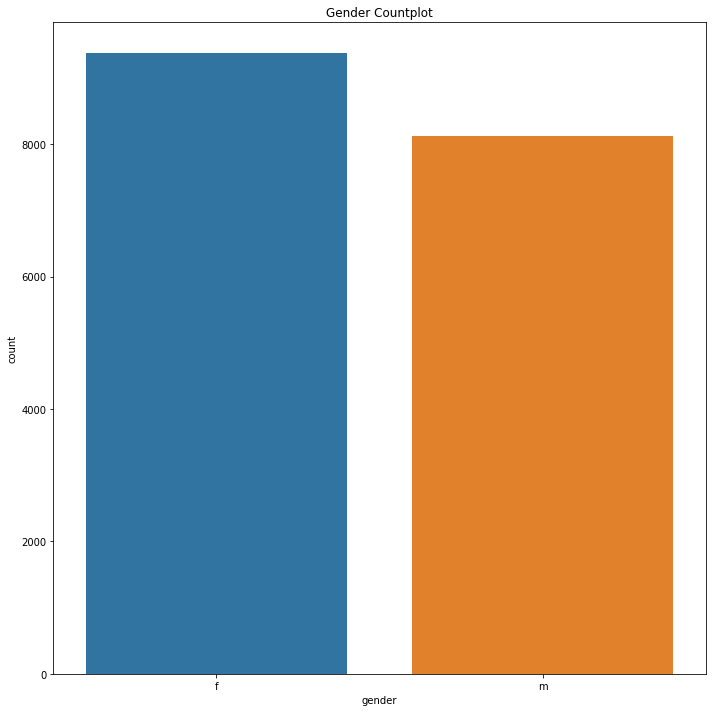

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Gender Countplot')
sns.countplot(x = df.gender , data = df)
plt.tight_layout()
plt.show()

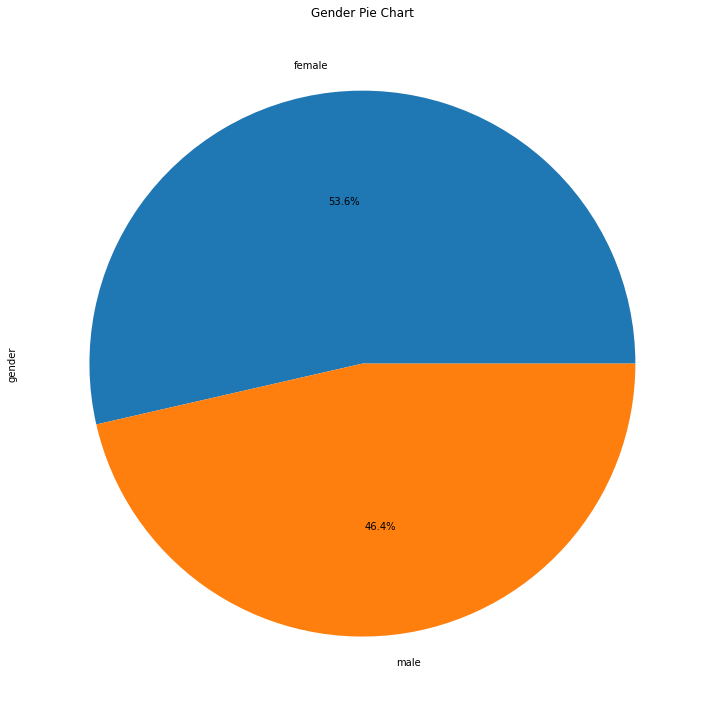

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Gender Pie Chart')
df.gender.value_counts().plot.pie(autopct= '%0.1f%%',labels = ['female','male'])

plt.tight_layout()
plt.show()

**Lets visualise this age column with diagram**


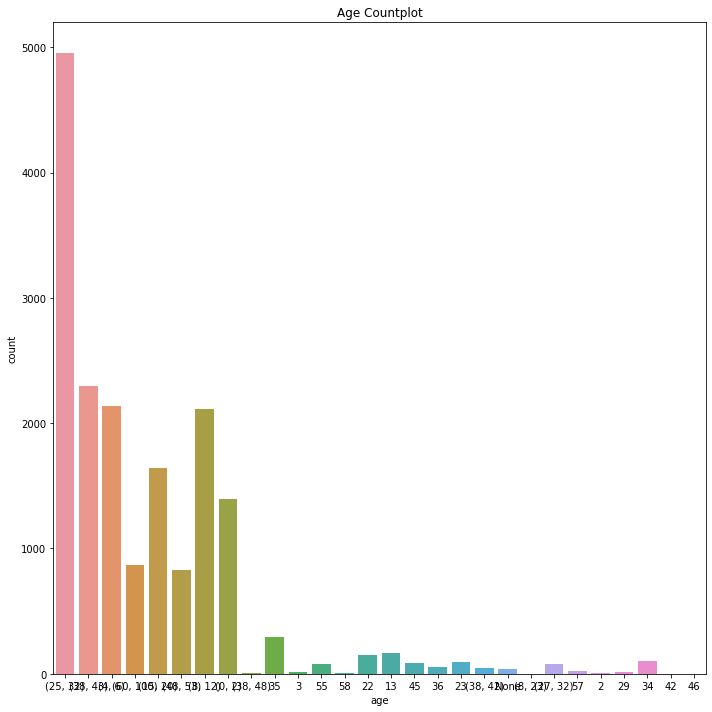

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Age Countplot')
sns.countplot(x = df.age , data = df)
plt.tight_layout()
plt.show()

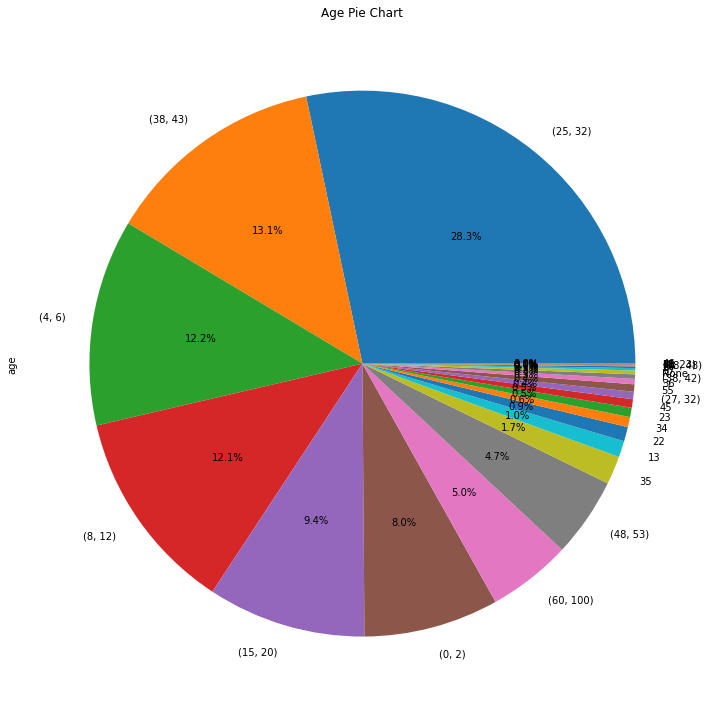

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Age Pie Chart')
df.age.value_counts().plot.pie(autopct= '%0.1f%%')

plt.tight_layout()
plt.show()

# Data Preprocessing -1

change the value of gender column

f -> 0

m -> 1

In [ ]:
change_gender_value =   {
      'f':0,
       'm':1
  }

In [ ]:
df.gender = df.gender.apply(lambda x : change_gender_value[x])
df.gender.value_counts()

0    9372
1    8120
Name: gender, dtype: int64

In [ ]:
# print(df.shape)
df.drop(df[df.age=='None'].index , inplace = True)
df.shape

(17452, 12)

change the value of age column

(25, 32)  =>    0

(38, 43)   =>  1

(4, 6)     =>  2

(8, 12)   =>   3

(15, 20)  =>   4

(0, 2)    =>   5

(60, 100) =>    6

(48, 53)    =>  7

35       =>     8

13       =>     9

22      =>      10

34        =>    11

23     =>        12

45      =>       13

(27, 32)  =>     14

55       =>      15

36       =>      16

(38, 42)    =>   17

57        =>      18

3      =>         19

29       =>       20

(38, 48)  =>      21

58        =>      22

2          =>     23

(8, 23)     =>    24

42          =>    25

46          =>    26

In [ ]:
df.age = df.age.map({
    '(25, 32)': 0, '(0, 2)': 1, '(38, 43)': 2, '(4, 6)': 3, '(8, 12)': 4, '(15, 20)': 5, 
    '(60, 100)': 6, '(48, 53)': 7, '35': 8, '13': 9, '22': 10, '34': 11, '23': 12, '45': 13, 
    '(27, 32)': 14, '55': 15, '36': 16, '(38, 42)': 17, '57': 18, '3': 19, '29': 20, 
    '(38, 48)': 21, '58': 22, '2': 23, '42': 24, '(8, 23)': 25, '46': 26
})

df.age.value_counts()

0     4951
2     2293
3     2139
4     2117
5     1640
1     1397
6      866
7      825
8      293
9      168
10     149
11     105
12      96
13      88
14      77
15      76
16      56
17      46
18      24
19      18
20      11
21       6
22       5
23       3
25       1
24       1
26       1
Name: age, dtype: int64

In [ ]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,0,0,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,0,1,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,0,0,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,0,1,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,0,1,175,80,769,768,-75,0,34


# Data Preprocessing - 2 

In [ ]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,0,0,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,0,1,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,0,0,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,0,1,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,0,1,175,80,769,768,-75,0,34


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import img_to_array, load_img ,  ImageDataGenerator
from keras.models import Sequential
from PIL import Image
import tensorflow as tf
import cv2 

** Explore Images**

In [ ]:

# function for exploring image according to row number 
def show_image(n):
  location = '/content/AdienceBenchmarkGenderAndAgeClassification/faces/'+df.user_id.loc[n] + '/coarse_tilt_aligned_face.' + str(df.face_id.loc[n]) + '.' + df.original_image.loc[n]
  # location

  image = load_img(location)
  plt.imshow(image)
  plt.show()

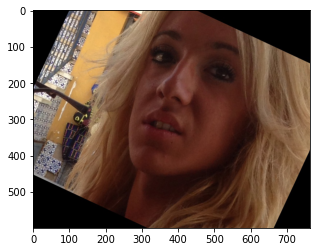

In [ ]:
# Let see first image 
show_image(0)

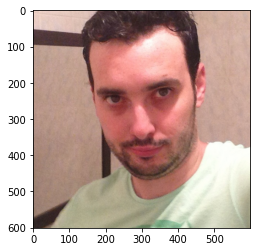

In [ ]:
# Let see second image
show_image(1)

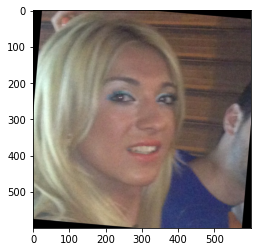

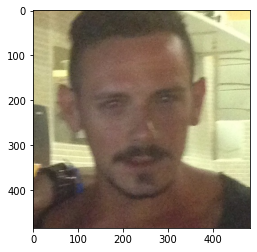

In [ ]:
show_image(2)
show_image(3)

** Make a final data frame for training**

In [ ]:
final_df  = df[['age', 'gender','x','y', 'dx', 'dy']].copy()
final_df.shape

(17452, 6)

In [ ]:
final_df.head()

,age,gender,x,y,dx,dy
0,0,0,0,414,1086,1383
1,0,1,301,105,640,641
2,0,0,2395,876,771,771
3,0,1,752,1255,484,485
4,0,1,175,80,769,768


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     17452 non-null  int64
 1   gender  17452 non-null  int64
 2   x       17452 non-null  int64
 3   y       17452 non-null  int64
 4   dx      17452 non-null  int64
 5   dy      17452 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


Add a new column of image in this final_df

In [ ]:
images = []

for row in df.iterrows():
  location = '/content/AdienceBenchmarkGenderAndAgeClassification/faces/'+row[1].user_id + '/coarse_tilt_aligned_face.' + str(row[1].face_id) + '.' + row[1].original_image
  images.append(location) 

df['images_location'] = images
final_df['images_location'] = images

In [ ]:
final_df.head()

,age,gender,x,y,dx,dy,images_location
0,0,0,0,414,1086,1383,/content/AdienceBenchmarkGenderAndAgeClassific...
1,0,1,301,105,640,641,/content/AdienceBenchmarkGenderAndAgeClassific...
2,0,0,2395,876,771,771,/content/AdienceBenchmarkGenderAndAgeClassific...
3,0,1,752,1255,484,485,/content/AdienceBenchmarkGenderAndAgeClassific...
4,0,1,175,80,769,768,/content/AdienceBenchmarkGenderAndAgeClassific...


In [ ]:
final_df.shape

(17452, 7)

# For Gender :  **Lets split the data  into training as well as testing**

In [ ]:
X  = final_df[['images_location']]
Y = final_df[['gender']]

In [ ]:
print(X.shape)
print(Y.shape)

(17452, 1)
(17452, 1)


In [ ]:
from sklearn.model_selection import train_test_split

train_X , test_X , train_Y , test_Y =  train_test_split(X,Y,test_size= 0.3, random_state = 42)

print("shape of train_X  : " , train_X.shape)
print("shape of test_X   : " , test_X.shape)

print("shape of train_Y  : " , train_Y.shape)
print("shape of test_Y   : " , test_Y.shape)



train_X_img = []
test_X_img = []

for row in train_X.iterrows():
  img = Image.open(row[1].images_location)
  img = img.resize((227,227))
  data = np.asarray(img)
  train_X_img.append(data)


for row in test_X.iterrows():
  img = Image.open(row[1].images_location)
  
  img = img.resize((227,227))
  data = np.asarray(img)
  test_X_img.append(data) 

train_X_img = np.asarray(train_X_img)
test_X_img = np.asarray(test_X_img)
print()
print("shape of train_X_img  : " , train_X_img.shape)
print("shape of test_X   : " , test_X_img.shape)

print("shape of train_Y_img  : " , train_Y.shape)
print("shape of test_Y   : " , test_Y.shape)

shape of train_X  :  (12216, 1)
shape of test_X   :  (5236, 1)
shape of train_Y  :  (12216, 1)
shape of test_Y   :  (5236, 1)

shape of train_X_img  :  (12216, 227, 227, 3)
shape of test_X   :  (5236, 227, 227, 3)
shape of train_Y_img  :  (12216, 1)
shape of test_Y   :  (5236, 1)


# Lets fit into the model now

In [ ]:
# model = Sequential()

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))
 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 28, 28, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
gender_prediction = model.fit(train_X_img, train_Y, batch_size=32, epochs=1, validation_data=(test_X_img, test_Y), callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 0.9247 - accuracy: 0.5321

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 1226s 3s/step - loss: 0.9247 - accuracy: 0.5321 - val_loss: 0.6926 - val_accuracy: 0.5241


In [ ]:
train_Y.gender.unique()

array([1, 0])

In [ ]:
test_loss_gender, test_acc_gender = model.evaluate(test_X_img, test_Y, verbose=2)
print(test_acc_gender)

164/164 - 127s - loss: 0.6926 - accuracy: 0.5241 - 127s/epoch - 774ms/step
0.5240641832351685


# For Age : **Lets split the dataset into taining and testing**

In [ ]:
X  = final_df[['images_location']]
Y = final_df[['age']]

In [ ]:
train_X , test_X , train_Y , test_Y =  train_test_split(X,Y,test_size= 0.3, random_state = 42)

print("shape of train_X  : " , train_X.shape)
print("shape of test_X   : " , test_X.shape)

print("shape of train_Y  : " , train_Y.shape)
print("shape of test_Y   : " , test_Y.shape)



train_X_img = []
test_X_img = []

for row in train_X.iterrows():
  img = Image.open(row[1].images_location)
  img = img.resize((227,227))
  data = np.asarray(img)
  train_X_img.append(data)


for row in test_X.iterrows():
  img = Image.open(row[1].images_location)
  
  img = img.resize((227,227))
  data = np.asarray(img)
  test_X_img.append(data) 

train_X_img = np.asarray(train_X_img)
test_X_img = np.asarray(test_X_img)
print()
print("shape of train_X_img  : " , train_X_img.shape)
print("shape of test_X   : " , test_X_img.shape)

print("shape of train_Y_img  : " , train_Y.shape)
print("shape of test_Y   : " , test_Y.shape)

shape of train_X  :  (12216, 1)
shape of test_X   :  (5236, 1)
shape of train_Y  :  (12216, 1)
shape of test_Y   :  (5236, 1)

shape of train_X_img  :  (12216, 227, 227, 3)
shape of test_X   :  (5236, 227, 227, 3)
shape of train_Y_img  :  (12216, 1)
shape of test_Y   :  (5236, 1)


Lets Fit into the model now

In [ ]:
model2 = Sequential()
model2.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())
model2.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())
model2.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(LayerNormalization())
model2.add(Flatten())
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(units= 27, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 layer_normalization_3 (Laye  (None, 28, 28, 96)       192       
 rNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                      

In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
age_prediction = model2.fit(train_X_img, train_Y, batch_size=32, epochs=1, validation_data=(test_X_img, test_Y), callbacks=[callback2])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 2.4661 - accuracy: 0.2590

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 1247s 3s/step - loss: 2.4661 - accuracy: 0.2590 - val_loss: 2.2366 - val_accuracy: 0.2792


In [ ]:
test_loss_age, test_acc_age = model2.evaluate(test_X_img, test_Y, verbose=2)
print(test_acc_age)

164/164 - 127s - loss: 2.2366 - accuracy: 0.2792 - 127s/epoch - 775ms/step
0.2792207896709442
